# Kernel Density Estimation

StatTools provides the `KernelDensityEstimator` class in its `smoothing` module to estimate the density of a univariate data sample.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.smoothing import KernelDensityEstimator
from stattools.datasets import load_old_faithful
from stattools.visualization import func_plot

## Example: simulated univariate Gaussian data

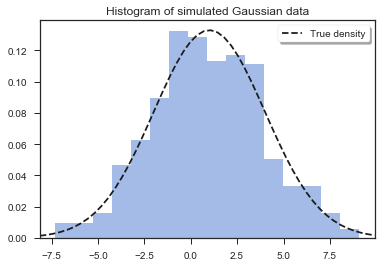

In [2]:
# Generate data
dist = st.norm(loc=1, scale=3)
data = dist.rvs(size=500, random_state=np.random.RandomState(0))

# Plot histogram of sample and true density
plt.figure()
plt.hist(data, bins="auto", alpha=0.5, density=True)
func_plot(dist.pdf, ls="--", c="k", label="True density")
plt.legend(loc="best", frameon=True, shadow=True)
plt.title("Histogram of simulated Gaussian data")
plt.show()
plt.close()

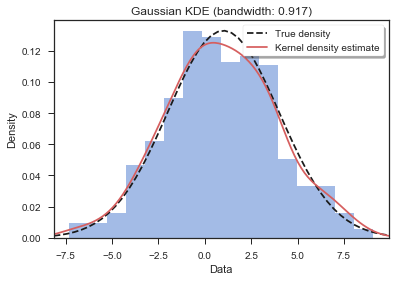

In [3]:
kde = KernelDensityEstimator()
kde.fit(data)

plt.figure()
plt.hist(data, bins="auto", alpha=0.5, density=True)
func_plot(dist.pdf, ls="--", c="k", label="True density")
kde.plot(c="r")
plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Gaussian KDE (bandwidth: {kde.bandwidth:.3f})")
plt.show()
plt.close()

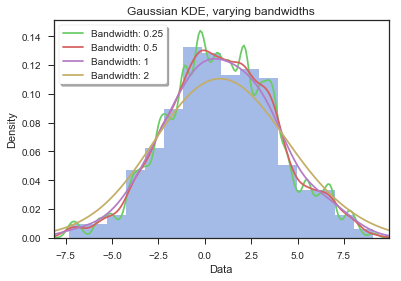

In [4]:
bandwidths = (0.25, 0.5, 1, 2)

plt.figure()
plt.hist(data, bins="auto", alpha=0.5, density=True)
for bandwidth in bandwidths:
    kde = KernelDensityEstimator()
    kde.fit(data, bandwidth=bandwidth)
    kde.plot(label=f"Bandwidth: {bandwidth}")
plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Gaussian KDE, varying bandwidths")
plt.show()
plt.close()

## Example: Old Faithful dataset

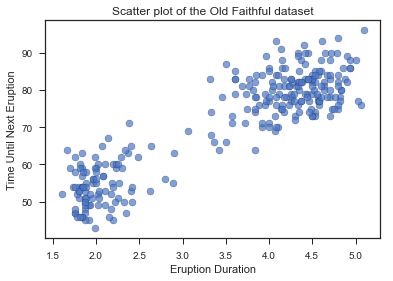

In [5]:
data = load_old_faithful()

plt.figure()
plt.scatter(data.Duration, data.Wait, c="b", edgecolor="k", alpha=0.7)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.title("Scatter plot of the Old Faithful dataset")
plt.show()
plt.close()

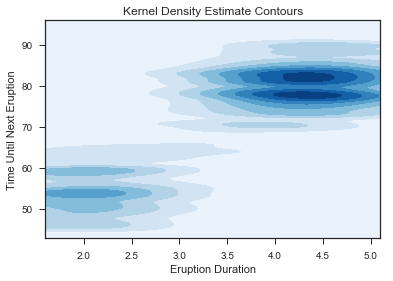

In [6]:
kde = KernelDensityEstimator()
kde.fit(data, bandwidth=0.7)

plt.figure()
plt.xlim(min(data.Duration), max(data.Duration))
plt.ylim(min(data.Wait), max(data.Wait))
kde.plot(cmap="Blues")
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.title("Kernel Density Estimate Contours")
plt.show()
plt.close()